In [1]:
%matplotlib inline  
%run 'functions.ipynb'

import tensorflow as tf
import numpy as np

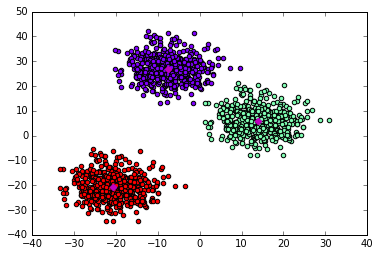

In [2]:
n_clusters = 3
n_points = 500
seed = 42

eps = 0.1

centroids, samples = create_samples(n_clusters, n_points,seed)
current_centroids = choose_random_centroids(samples,n_clusters,seed)
prev_centroids = None


model = tf.initialize_all_variables()
with tf.Session() as session:
    session.run(model)
    sample_values = session.run(samples)
    while True:
        nearest_indices = assign_to_cluster(samples, current_centroids)
        current_centroids = update_centroids(samples, nearest_indices, n_clusters)
        centroid_vals = session.run(current_centroids)
        if prev_centroids is not None and np.sqrt(np.sum((prev_centroids-centroid_vals)**2)) < eps:
         break
        prev_centroids = centroid_vals
    
plot_clusters(sample_values, centroid_vals, n_points)